# Model Comparison

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from Model_comparison_functions import *

Open the result json files:


In [2]:
desktop_path = os.path.expanduser("~/Desktop")

In [3]:
os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
current_directory = os.getcwd() # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...
df_Exp_rev = json_to_df(current_directory + '\\Results\\' + 'Exp_revenue - Copy.json')
df_RT_rev = json_to_df(current_directory + '\\Results\\' + 'RT_revenue - Copy.json')


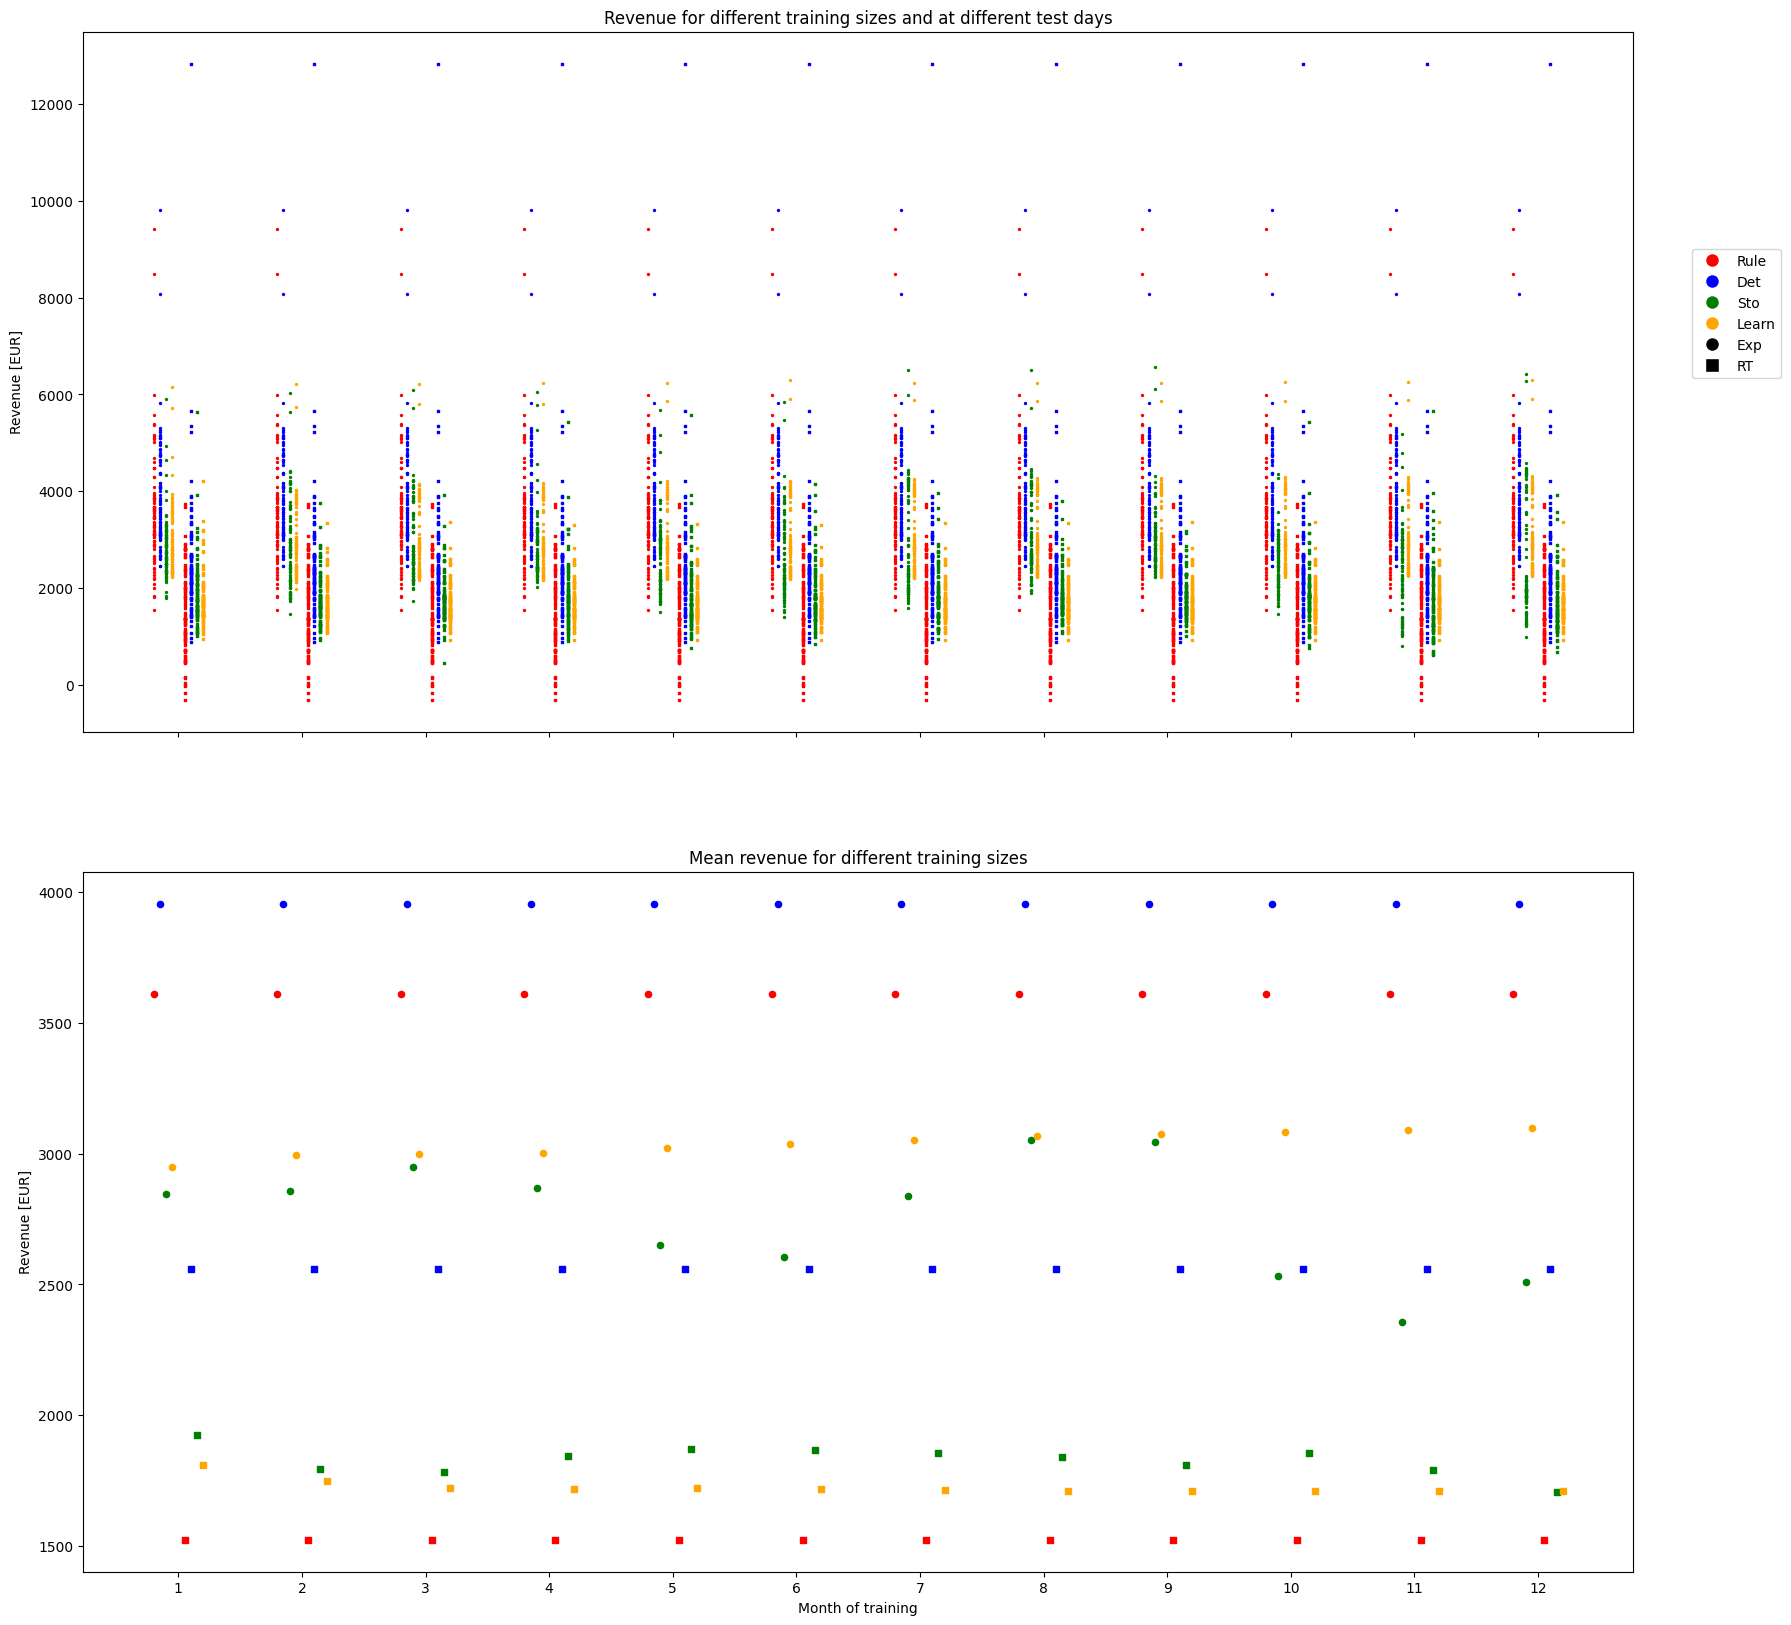

In [4]:
# Summary results
Array = Create_Array_from_Rev(df_Exp_rev,df_RT_rev)
plot_Revenue_Test(Array)

In [46]:
fixd0 = [f'm{m}_d{0}_t{1}' for m in range(1,13)]
fixd30 = [f'm{m}_d{30}_t{31}' for m in range(1,13)]
fixd60 = [f'm{m}_d{60}_t{61}' for m in range(1,13)]

In [27]:
df_RT_rev[fixd0].T

,sto,det,learn,rule
m1_d0_t1,2469.772613,3491.090966,2106.742943,2798.355586
m2_d0_t1,2139.430739,3491.090966,2090.363442,2798.355586
m3_d0_t1,2109.622092,3491.090966,2083.633902,2798.355586
m4_d0_t1,2502.505544,3491.090966,2081.342245,2798.355586
m5_d0_t1,2525.475817,3491.090966,2082.814993,2798.355586
m6_d0_t1,2186.481410,3491.090966,2081.008121,2798.355586
m7_d0_t1,2374.806832,3491.090966,2077.453393,2798.355586
m8_d0_t1,2505.742543,3491.090966,2076.363633,2798.355586
m9_d0_t1,2523.258094,3491.090966,2076.307664,2798.355586
m10_d0_t1,2950.936035,3491.090966,2076.212280,2798.355586


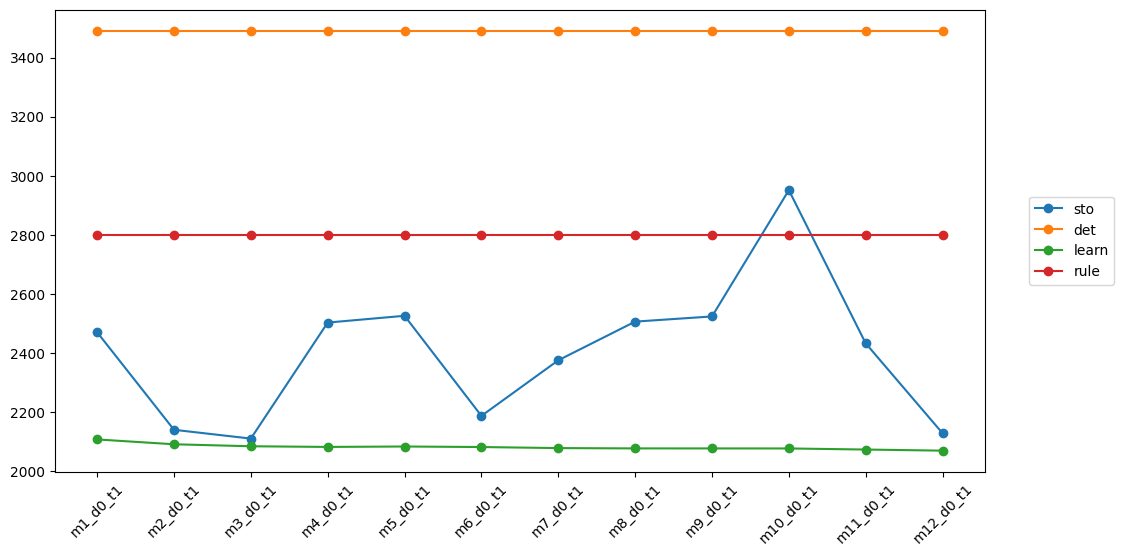

In [45]:
plt.figure(figsize=(12,6))
plt.plot(df_RT_rev[fixd0].T, 'o-')
plt.xticks(rotation = 45)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")

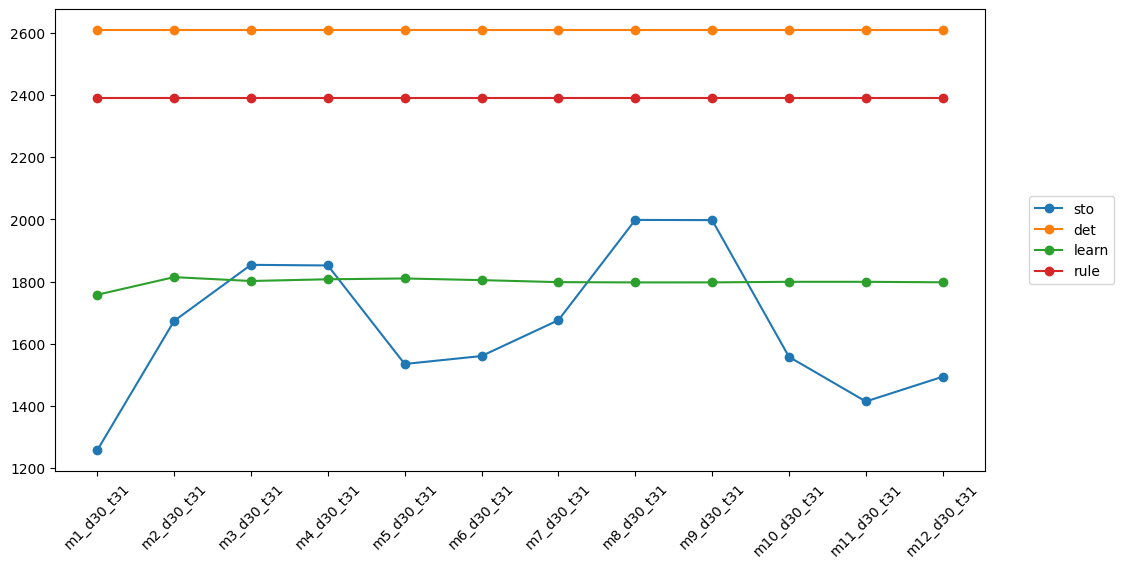

In [47]:
plt.figure(figsize=(12,6))
plt.plot(df_RT_rev[fixd30].T, 'o-')
plt.xticks(rotation = 45)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")

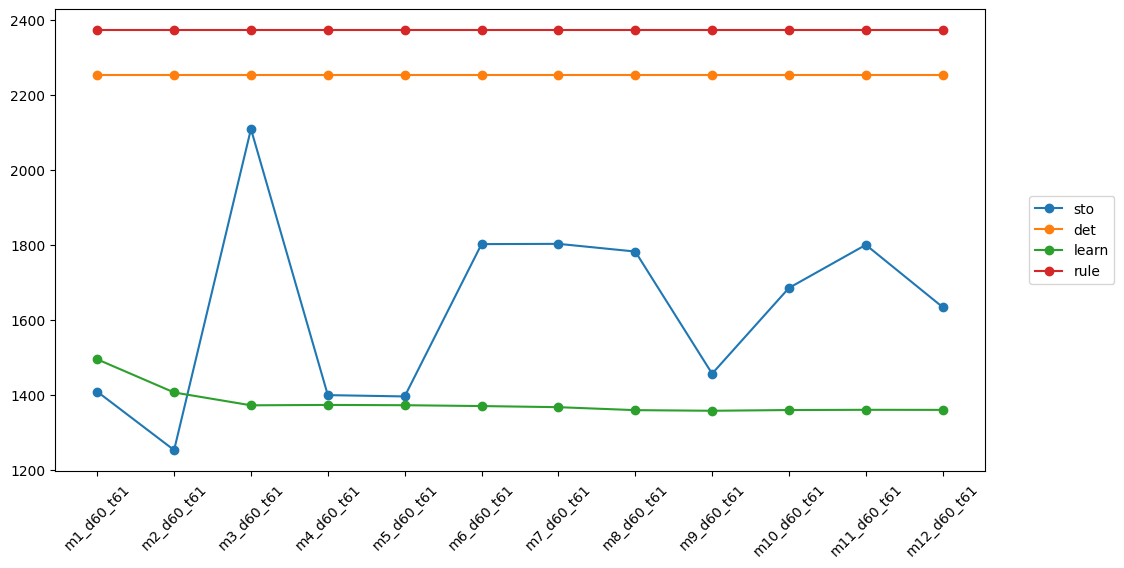

In [48]:
plt.figure(figsize=(12,6))
plt.plot(df_RT_rev[fixd60].T, 'o-')
plt.xticks(rotation = 45)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")

In [58]:
fixm1 = [f'm{1}_d{d}_t{d+1}' for d in range(0,88)]
fixm6 = [f'm{6}_d{d}_t{d+1}' for d in range(0,88)]
fixm12 = [f'm{12}_d{d}_t{d+1}' for d in range(0,88)]

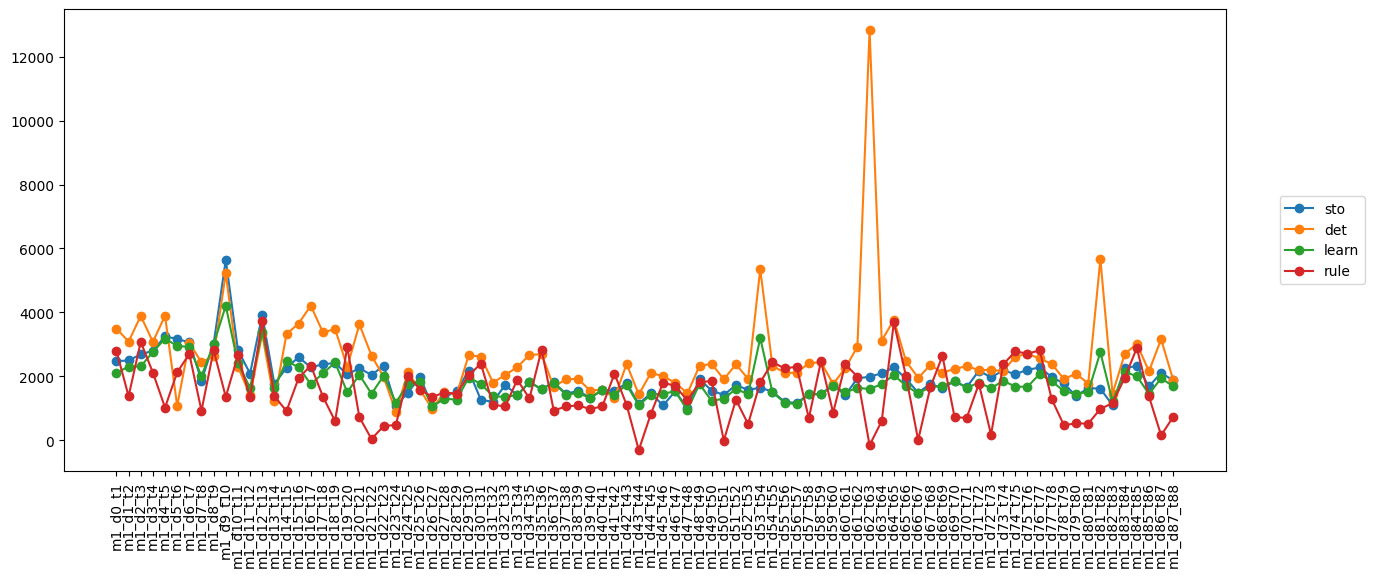

In [62]:
plt.figure(figsize=(15,6))
plt.plot(df_RT_rev[fixm1].T, 'o-')
plt.xticks(rotation = 90)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")

In [68]:
df_RT_rev[fixm1].mean(axis=1)

sto      1923.305624
det      2559.495245
learn    1808.037151
rule     1522.911502
dtype: float64

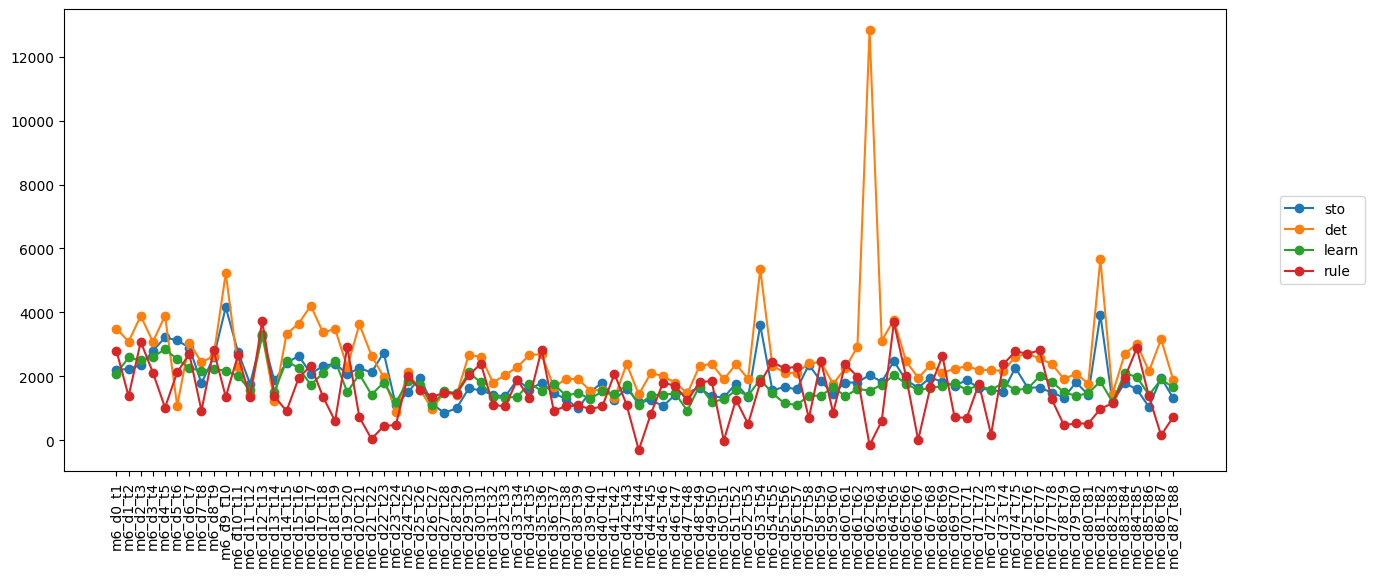

In [63]:
plt.figure(figsize=(15,6))
plt.plot(df_RT_rev[fixm6].T, 'o-')
plt.xticks(rotation = 90)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")

In [69]:
df_RT_rev[fixm6].mean(axis=1)

sto      1868.516126
det      2559.495245
learn    1716.690401
rule     1522.911502
dtype: float64

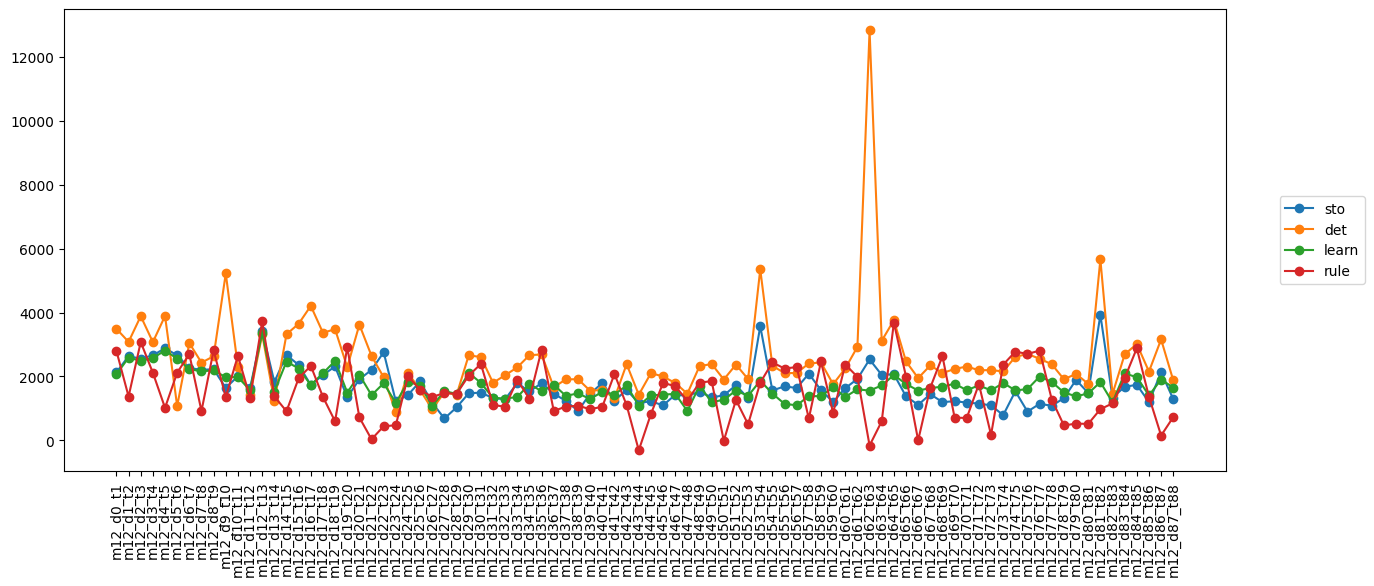

In [64]:
plt.figure(figsize=(15,6))
plt.plot(df_RT_rev[fixm12].T, 'o-')
plt.xticks(rotation = 90)
plt.legend(['sto', 'det', 'learn', 'rule'], bbox_to_anchor=(1.04, 0.5), loc="center left")

In [70]:
df_RT_rev[fixm12].mean(axis=1)

sto      1706.864045
det      2559.495245
learn    1710.913251
rule     1522.911502
dtype: float64

In [71]:
df_RT_rev['m1_d62_t63']

sto       1982.479636
det      12838.307897
learn     1600.816418
rule      -164.083557
Name: m1_d62_t63, dtype: float64

In [72]:
df_Exp_rev['m1_d62_t63']

sto      2341.577983
det      5829.079126
learn    2297.603062
rule     1549.675685
Name: m1_d62_t63, dtype: float64

### Open json results and plot
Plots: 
1) Bid quantity
2) bid price used for training 
3) bid price
4) accepted bid price
5) coefficients(learning)
6) Expected and RT revenue
7) Battery dynamics

### Test case: M1 d62 t63  
(Where deterministic model has a peak performance)

In [4]:
#Fix color schemes
color = {'FD2_up': '#FFA500', # orange
         'FD2_dn': '#2986cc', # blue
         'DA_up': '#f44336', # red 
         'DA_dn': 'green', # green
         'FD1_up': '#b26d02', # brown orange
         'FD1_dn': '#674ea7', # darkgreen
         'SOC': 'black'}

In [5]:
# Opening JSON file
choose_id = 'm1_d62_t63'
det_bid, det_RT, learn_bid, learn_RT, sto_bid, sto_RT, rule_bid, rule_RT = import_test_case(current_directory, choose_id)

In [6]:
rule_bid['SOC']

array([0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ])

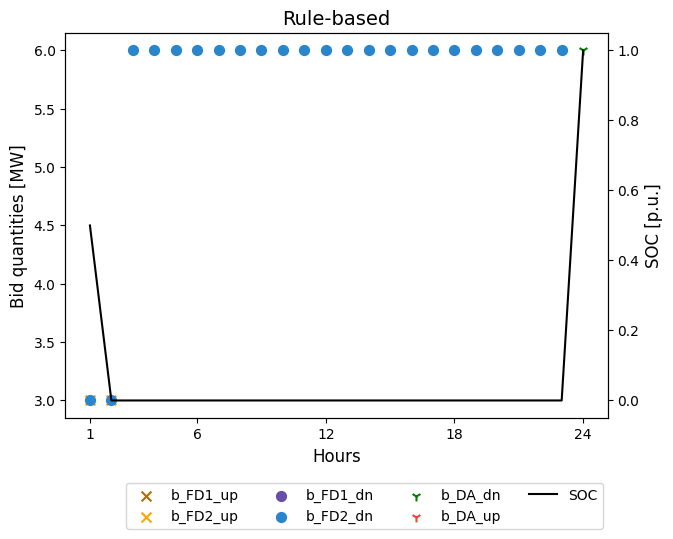

In [7]:
# bid_plots(det_bid, 'Deterministic', color)
# bid_plots(learn_bid, 'Learning', color)
# bid_plots(sto_bid, 'Stochastic', color)
bid_plots(rule_bid, 'Rule-based', color)

Investigate why Rule-based model bids both FD2 up and down in the first two hours..

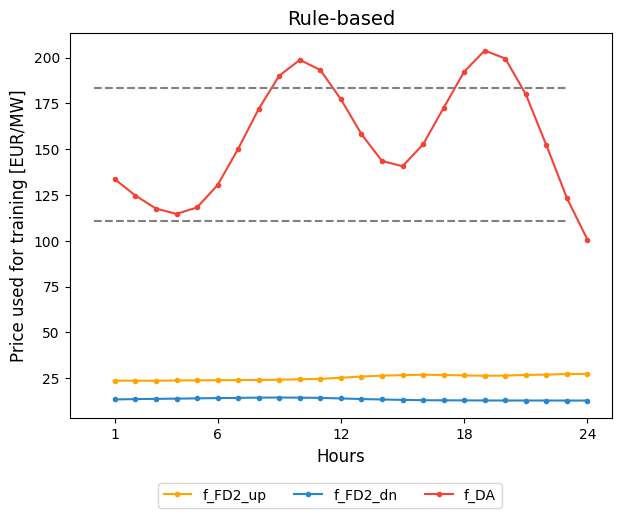

In [8]:
with_acceptance = False #True or False
bid_result = rule_bid # det_bid, rule_bid, learn_bid, sto_bid
model = 'Rule-based' # 'Deterministic', 'Rule-based', 'Learning', 'Stochastic'
plot_training_price(with_acceptance, bid_result, model, color)

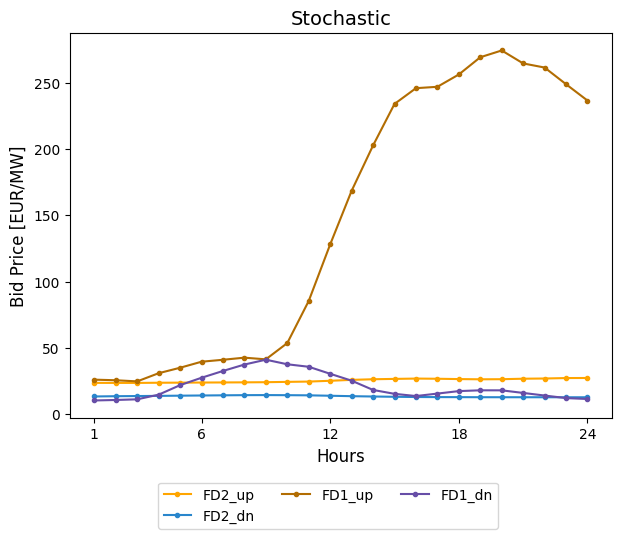

In [9]:
bid_result = sto_bid #det_bid, rule_bid, learn_bid, sto_bid
model = 'Stochastic' # 'Deterministic', 'Rule-based', 'Learning', 'Stochastic'
plot_bidding_price(bid_result, model, color)

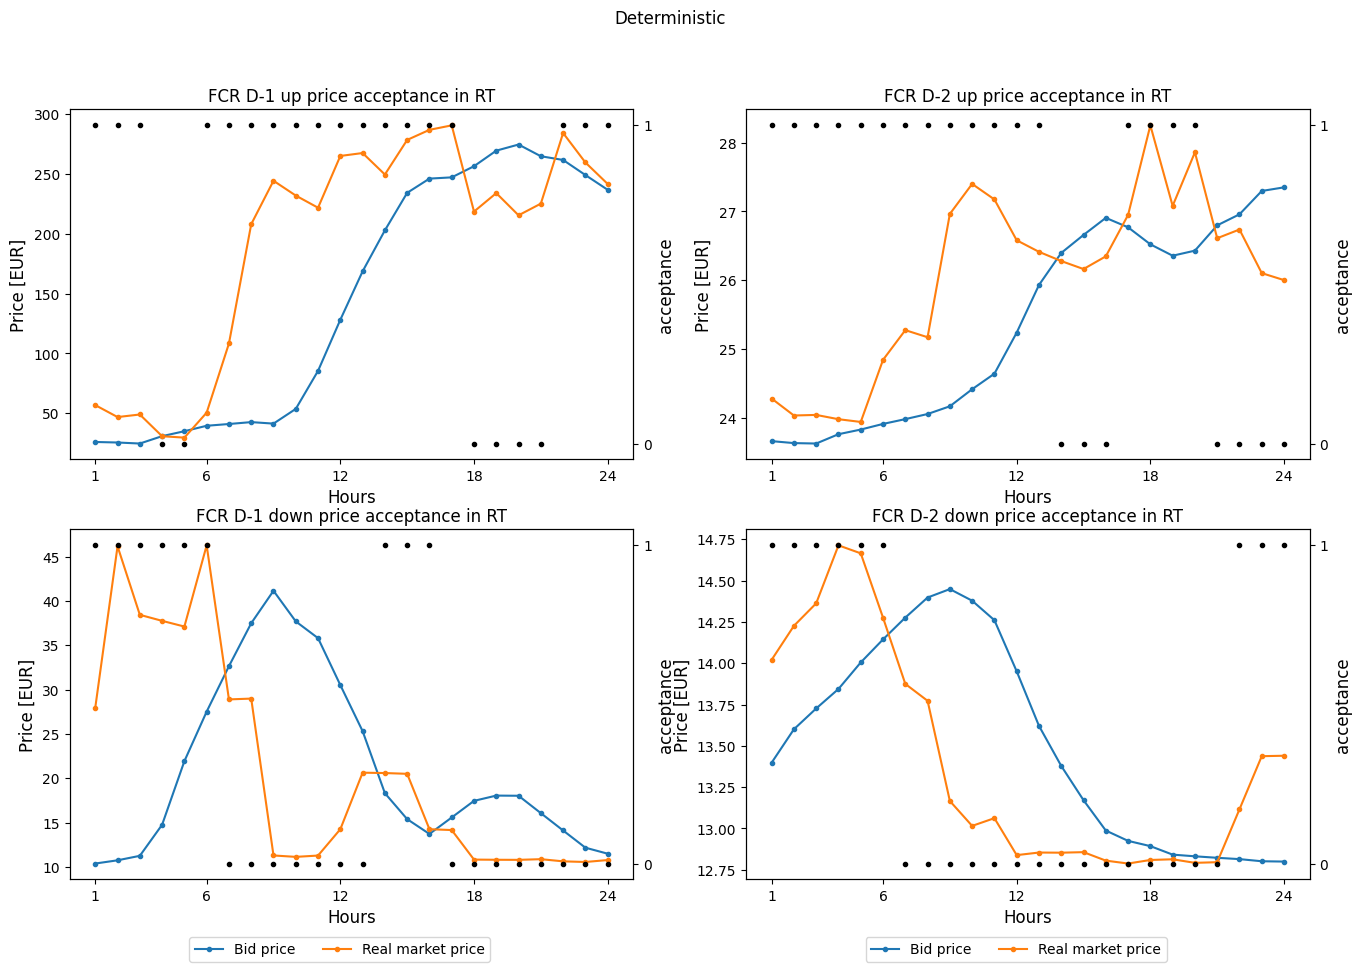

In [10]:
data_RT_input = det_RT # det_RT, learn_RT, sto_RT, rule_RT
model = 'Deterministic'
plot_accepted_price(data_RT_input, model)

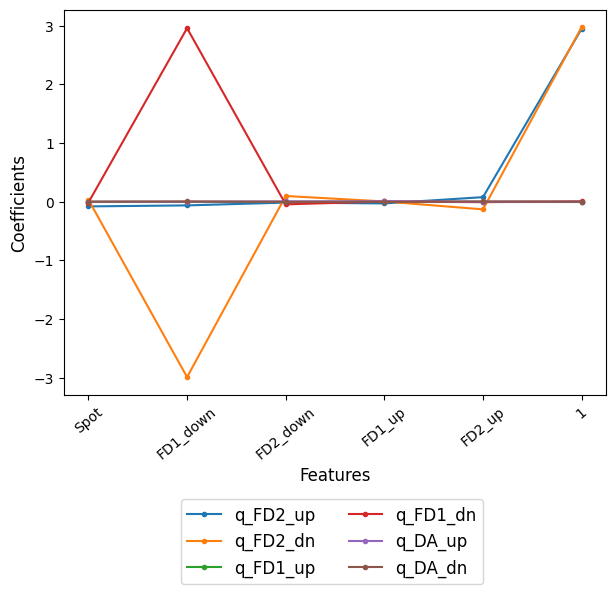

In [11]:
plot_coefficients(learn_bid)

In [12]:
print('det_RT_revenue: ', det_RT['revenue'])
print('sto_RT_revenue: ', sto_RT['revenue'])
print('learn_RT_revenue: ', learn_RT['revenue'])
print('rule_RT_revenue: ', rule_RT['revenue'])
print('')
print('det_Exp_revenue: ', sum(det_bid['obj_t']))
print('sto_Exp_revenue: ', sum(sto_bid['obj_t']))
print('learn_Exp_revenue: ', sum(learn_bid['obj_t'].flatten()))
print('rule_Exp_revenue: ', sum(rule_bid['obj_t']))

det_RT_revenue:  12838.307897167027
sto_RT_revenue:  1982.4796358281092
learn_RT_revenue:  1600.8164177853282
rule_RT_revenue:  -164.08355691815467

det_Exp_revenue:  5829.079125563578
sto_Exp_revenue:  2341.5779833683087
learn_Exp_revenue:  2297.6030623779398
rule_Exp_revenue:  1549.6756847817724


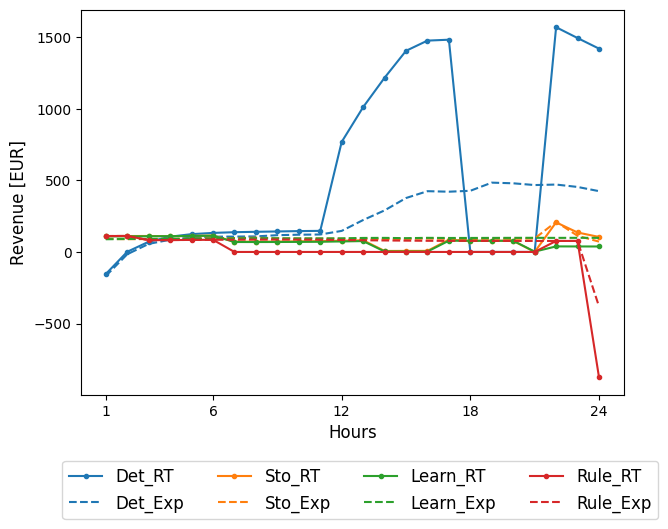

In [13]:
plot_exp_and_RT_revenue(det_RT, det_bid, sto_RT, sto_bid, learn_RT, learn_bid, rule_RT, rule_bid)

In [14]:
rule_RT['SOC'] # max SOC lim??

array([3.0001063 , 3.00119426, 3.00372957, 3.00610934, 3.00610934,
       3.00610934, 3.00610934, 3.00610934, 3.00610934, 3.00610934,
       3.00610934, 3.00610934, 3.00610934, 3.00610934, 3.00610934,
       3.00610934, 3.00610934, 3.00610934, 3.00610934, 3.00610934,
       3.00610934, 3.00610934, 3.00610934, 8.88610934])

In [15]:
rule_RT['p_all_dn']

array([1.08466667e-04, 1.11017083e-03, 2.58704167e-03, 2.42834167e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.00000000e+00])

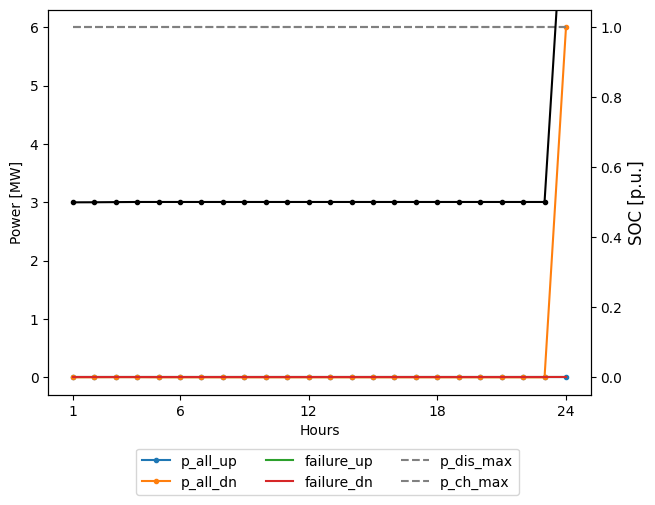

In [19]:
RTresult = rule_RT
plot_battery_dynamics(RTresult)

Investigate why SOC in the last hour shoots up to 8 in the rule-based model

### Test case: M1 D9 t10 
Case when stochastic model performs the best